[link script](https://nbviewer.org/github/NeuroanatomyAndConnectivity/gradient_analysis/blob/master/04_visualize_networks.ipynb)

In [1]:
%matplotlib inline 

# !git clone https://github.com/margulies/gradient_analysis

import h5py, sys, io, os, numpy as np
import nibabel as nib
import nibabel.gifti
import nilearn
from nilearn import datasets, plotting
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
mpl.rcParams['svg.fonttype'] = 'none'

In [2]:
from brainspace.datasets import load_group_fc, load_parcellation, load_conte69

In [3]:
# !git clone https://github.com/gablab/cerebellum_gradients/

In [29]:
import sys
import pandas as pd

# sys.path.append('/content/gradient_analysis/gradient_data/templates')
templates_path = '/home/romy.beaute/projects/hypnomed/data/template'
templates_marguilies = '/home/romy.beaute/projects/hypnomed/analysis/gradient_analysis/gradient_data/templates'
DMN_mask_path = '/home/romy.beaute/projects/hypnomed/data/DMN_mask'

output_path = '/home/romy.beaute/projects/hypnomed/analysis/scripts_stats/figures/yeo_networks/'

yeo_infos = pd.read_csv('/home/romy.beaute/projects/hypnomed/data/yeo_infos/7NetworksOrderedNames.csv',delimiter=',')
networks_labels = list(yeo_infos[' Network Name'])

colors = ['purple','blue','green','violet','cream','orange','red']
yeo_infos['colors']=colors 



yeo_infos

,Network Order,Network Name,colors
0,1,Visual,purple
1,2,Somatomotor,blue
2,3,Dorsal Attention,green
3,4,Salience / Ventral Attention,violet
4,5,Limbic,cream
5,6,Control,orange
6,7,Default,red


In [35]:
# yeo = np.load(os.path.join(DMN_mask_path,'yeo_DMN_IFG.npy'))
yeo = np.load(os.path.join(DMN_mask_path,'yeo_DMN.npy'))

for label_id, label in enumerate(networks_labels):
    network_mask = yeo==(networks_labels.index(label)+1)

network_mask
np.array(np.unique(yeo), dtype=np.int32)[1::]

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int32)

In [5]:

def imageCrop(filename):

    from PIL import Image

    i1 = Image.open(filename)
    i2 = np.array(i1)
    i2[i2.sum(axis=2) == 255*4,:] = 0
    i3 = i2.sum(axis=2)
    x = np.where((i3.sum(axis=1) != 0) * 1)[0]
    y = np.where((i3.sum(axis=0) != 0) * 1)[0]

    result = Image.fromarray(i2[x.squeeze()][:,y.squeeze()])
    result.save(filename)

In [6]:

surfmL = nib.freesurfer.read_geometry(templates_marguilies+'/Q1-Q6_R440.L.midthickness.32k_fs_LR.surf')
surfiL = nib.freesurfer.read_geometry(templates_marguilies+'/Q1-Q6_R440.L.very_inflated.32k_fs_LR.surf')
surfL = []
surfL.append(np.array(surfmL[0]*0.3 + surfiL[0]*0.7))
surfL.append(surfmL[1])

surfmR = nib.freesurfer.read_geometry(templates_marguilies+'/Q1-Q6_R440.R.midthickness.32k_fs_LR.surf')
surfiR = nib.freesurfer.read_geometry(templates_marguilies+'/Q1-Q6_R440.R.very_inflated.32k_fs_LR.surf')
surfR = []
surfR.append(np.array(surfmR[0]*0.3 + surfiR[0]*0.7))
surfR.append(surfmR[1])


sulcL = -1 * nib.load(templates_marguilies+'/Q1-Q6_R440.sulc.32k_fs_LR.dscalar.nii').get_fdata()[0:32492]
sulcR = -1 * nib.load(templates_marguilies+'/Q1-Q6_R440.sulc.32k_fs_LR.dscalar.nii').get_fdata()[32492:32492*2]

# res = nib.load(templates_path+'/hcp.tmp.lh.dscalar.nii').get_fdata()
res = nib.load(templates_path+'/hcp.tmp.lh.dscalar.nii').get_fdata()
cortL = np.squeeze(np.array(np.where(res != 0)[1],dtype=np.int32))
# res = nib.load(templates_path+'/hcp.tmp.rh.dscalar.nii').get_fdata()
res = nib.load(templates_path+'/hcp.tmp.rh.dscalar.nii').get_fdata()
cortR = np.squeeze(np.array(np.where(res != 0)[1], dtype=np.int32))
cortLen = len(cortL) + len(cortR)
del res

pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


In [7]:
import sys
sys.path.append('/home/romy.beaute/projects/hypnomed/META/')
from scipy.io import loadmat
from helpers_gradient import *

embmat_path = '/home/romy.beaute/projects/hypnomed/data/emb_matrices'
matfile = 'control_meditation_hypnose'
# emb = np.load(embmat_path+'/group_{}_embedding.mat'.format(matfile))

b,b_emb = load_embmat(embmat_path+'/group_{}_embedding.mat'.format(matfile),show_infos=True)
b_emb.shape


outliers_indxs = [15,27,32,40]
outliers_indxs_hyp = [15,27,39]
outliers = [x-1 for x in outliers_indxs]
outliers_hyp = [x-1 for x in outliers_indxs_hyp]
print(outliers,outliers_hyp)
# print('Subject removed (hypnose): ',outliers_hyp)

emb_con = np.delete(b_emb[:40],outliers,0)
emb_med = np.delete(b_emb[40:80],outliers,0)
emb_hyp = np.delete(b_emb[80:],outliers_hyp,0)

print(emb_con.shape,emb_med.shape,emb_hyp.shape)
embeddings = {
    'control':emb_con,
    'meditation':emb_med,
    'hypnose':emb_hyp
    }

 - shape embedding (n_subjects, n_voxels, n_dims): (119, 18715, 5)
 - n = 40 subjects
 - condition : ['control   ' 'meditation' 'hypnose   ']
 - path : /home/romy.beaute/projects/hypnomed/data/emb_matrices/group_control_meditation_hypnose_embedding.mat

[14, 26, 31, 39] [14, 26, 38]
(36, 18715) (36, 18715) (36, 18715)


In [8]:
from nilearn import surface


fsaverage = datasets.fetch_surf_fsaverage()

nilearn.datasets.fetch_surf_fsaverage(mesh='fsaverage5', data_dir=None).sulc_left

sulc_l = surface.load_surf_data(fsaverage['sulc_left'])
sulc_r = 10242+surface.load_surf_data(fsaverage['sulc_right'])
# sulc_r = surface.load_surf_data(fsaverage['sulc_right'])


surf_l = surface.load_surf_data(fsaverage['infl_left']) #infl_left
surf_r = 10242+surface.load_surf_data(fsaverage['infl_right']) #infl_right
# surf_r = surface.load_surf_data(fsaverage['infl_right']) #infl_right

# nilearn.datasets.fetch_surf_fsaverage(mesh='fsaverage5', data_dir=None).sulc_left


/home/romy.beaute/anaconda3/lib/python3.9/site-packages/nilearn/surface/surface.py:671: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.asarray([arr.data for arr in gifti_img.darrays]).T.squeeze()


### Yeo7 networks

In [9]:
# yeo7L = nib.gifti.read(templates_path+'/hcp.RSN.L.gii').darrays[0].data
yeo7L = nib.load(templates_marguilies+'/hcp.RSN.L.gii').darrays[0].data
yeo7R = nib.load(templates_marguilies+'/hcp.RSN.R.gii').darrays[0].data
# yeo17L = nib.load(templates_path+'/hcp.RSN.L.gii').darrays[1].data
# yeo17R = nib.load(templates_path+'/hcp.RSN.R.gii').darrays[1].data

### Fetch Yeo Atlas from Nilearn

https://nilearn.github.io/dev/auto_examples/06_manipulating_images/plot_extract_regions_labels_image.html#sphx-glr-auto-examples-06-manipulating-images-plot-extract-regions-labels-image-py

Yeo atlas nifti image (3D) with 7 parcels and liberal mask is located at: /home/romy.beaute/nilearn_data/yeo_2011/Yeo_JNeurophysiol11_MNI152/Yeo2011_7Networks_MNI152_FreeSurferConformed1mm_LiberalMask.nii.gz


/home/romy.beaute/anaconda3/lib/python3.9/site-packages/nilearn/plotting/img_plotting.py:300: FutureWarning: Default resolution of the MNI template will change from 2mm to 1mm in version 0.10.0
  anat_img = load_mni152_template()


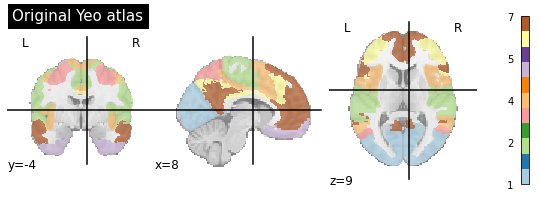

In [10]:
# First we fetch the Yeo atlas
from nilearn import datasets,plotting

atlas_yeo_2011 = datasets.fetch_atlas_yeo_2011()
print('Yeo atlas nifti image (3D) with 7 parcels and liberal mask is located '
      'at: %s' % atlas_yeo_2011['thick_7'])

atlas_yeo7 = atlas_yeo_2011.thick_7
colors_yeo7 = atlas_yeo_2011.colors_7


plotting.plot_roi(atlas_yeo7, title='Original Yeo atlas',
                  cut_coords=(8, -4, 9), colorbar=True, cmap='Paired')

In [11]:
atlas_yeo_2011.description

"Yeo 2011 Atlas\n\n\nNotes\n-----\nThis atlas provides a labeling of some cortical voxels in the MNI152\nspace.\n\nFour versions of the atlas are available, according to the cortical\nmodel (thick or thin cortical surface) and to the number of regions\nconsidered (7 or 17).\n\nContent\n-------\n    :'anat': Background anatomical image for reference and visualization\n    :'thin_7': Cortical parcelation into 7 regions, thin cortical model\n    :'thin_17': Cortical parcelation into 17 regions, thin cortical model\n    :'thick_7': Cortical parcelation into 17 regions, thick cortical model\n    :'thick_17': Cortical parcelation into 17 regions, thick cortical model\n    :'colors_7': Text file for the coloring of 7-regions parcellation\n    :'colors_17': Text file for the coloring of 17-regions parcellation\n\n\nReferences\n----------\nFor more information on this dataset's structure, see\nhttp://surfer.nmr.mgh.harvard.edu/fswiki/CorticalParcellation_Yeo2011\n\nYeo BT, Krienen FM, Sepulcre 

In [12]:
def load_yeo7_atlas():
    '''
    The blurred, 7-network estimate from Yeo et al. 2011.
    Uses the assigned colors, and ROI names inferred from Figure 12 of the Yeo paper.
    '''
    yeo_atlas = nilearn.datasets.fetch_atlas_yeo_2011('rois')
    yeo_7 = nilearn.image.load_img(yeo_atlas.thick_7)

    RGB = 'R G B'.split()
    labels7 = pd.read_csv(yeo_atlas.colors_7, skiprows=1,
                        sep='\s+', index_col=0, names='Label R G B Name'.split())
    labels7.loc[:,'Name'] = ['Visual', 'Somatomotor', 'Dorsal Attention', 'Ventral Attention', 'Limbic', 'Frontoparietal', 'Default']
    labels7[RGB] = labels7[RGB] / 255

    return yeo_7, labels7

yeo_7, labels7 = load_yeo7_atlas()
labels7

,Label,R,G,B,Name
1,7Networks_1,0.470588,0.070588,0.525490,Visual
2,7Networks_2,0.274510,0.509804,0.705882,Somatomotor
3,7Networks_3,0.000000,0.462745,0.054902,Dorsal Attention
4,7Networks_4,0.768627,0.227451,0.980392,Ventral Attention
5,7Networks_5,0.862745,0.972549,0.643137,Limbic
6,7Networks_6,0.901961,0.580392,0.133333,Frontoparietal
7,7Networks_7,0.803922,0.243137,0.305882,Default


In [13]:
nib.load('/home/romy.beaute/nilearn_data/yeo_2011/Yeo_JNeurophysiol11_MNI152/Yeo2011_7Networks_MNI152_FreeSurferConformed1mm_LiberalMask.nii.gz').get_fdata().shape
nilearn.image.load_img(atlas_yeo7)
nib.load(atlas_yeo7).get_fdata().shape

(256, 256, 256, 1)

In [14]:
from nilearn.maskers import NiftiLabelsMasker

# create masker to extract functional data within atlas parcels
masker_yeo7 = NiftiLabelsMasker(labels_img=atlas_yeo7, standardize=True,
                           memory='nilearn_cache')

# grab center coordinates for atlas labels
coordinates = plotting.find_parcellation_cut_coords(labels_img=atlas_yeo7)
coordinates

array([[-22.26254905, -77.77055908,   3.67973072],
       [-36.61613048, -21.41024624,  40.9779725 ],
       [-35.23847176, -56.43335729,  32.62734976],
       [-42.22200293,   5.60183828,   2.38344423],
       [-27.25500787,  12.01417075, -27.1632479 ],
       [-39.85846042,  34.0926908 ,  20.24974472],
       [-22.87545889,  38.13783247,  20.71047782]])

In [15]:
masker_yeo7

NiftiLabelsMasker(labels_img='/home/romy.beaute/nilearn_data/yeo_2011/Yeo_JNeurophysiol11_MNI152/Yeo2011_7Networks_MNI152_FreeSurferConformed1mm_LiberalMask.nii.gz',
                  memory='nilearn_cache', standardize=True)

In [16]:
# Load Freesurfer fsaverage surface with read_label : return array with indices of vertices included in label
lab_lh = nib.freesurfer.read_label(templates_path+'/lh.cortex.label') #shape = (9361,)
lab_rh = 10242 + nib.freesurfer.read_label(templates_path+'/rh.cortex.label') #shape = (9361,)

lab= np.concatenate((lab_lh,lab_rh))


In [17]:
masker_yeo7.labels_img

'/home/romy.beaute/nilearn_data/yeo_2011/Yeo_JNeurophysiol11_MNI152/Yeo2011_7Networks_MNI152_FreeSurferConformed1mm_LiberalMask.nii.gz'

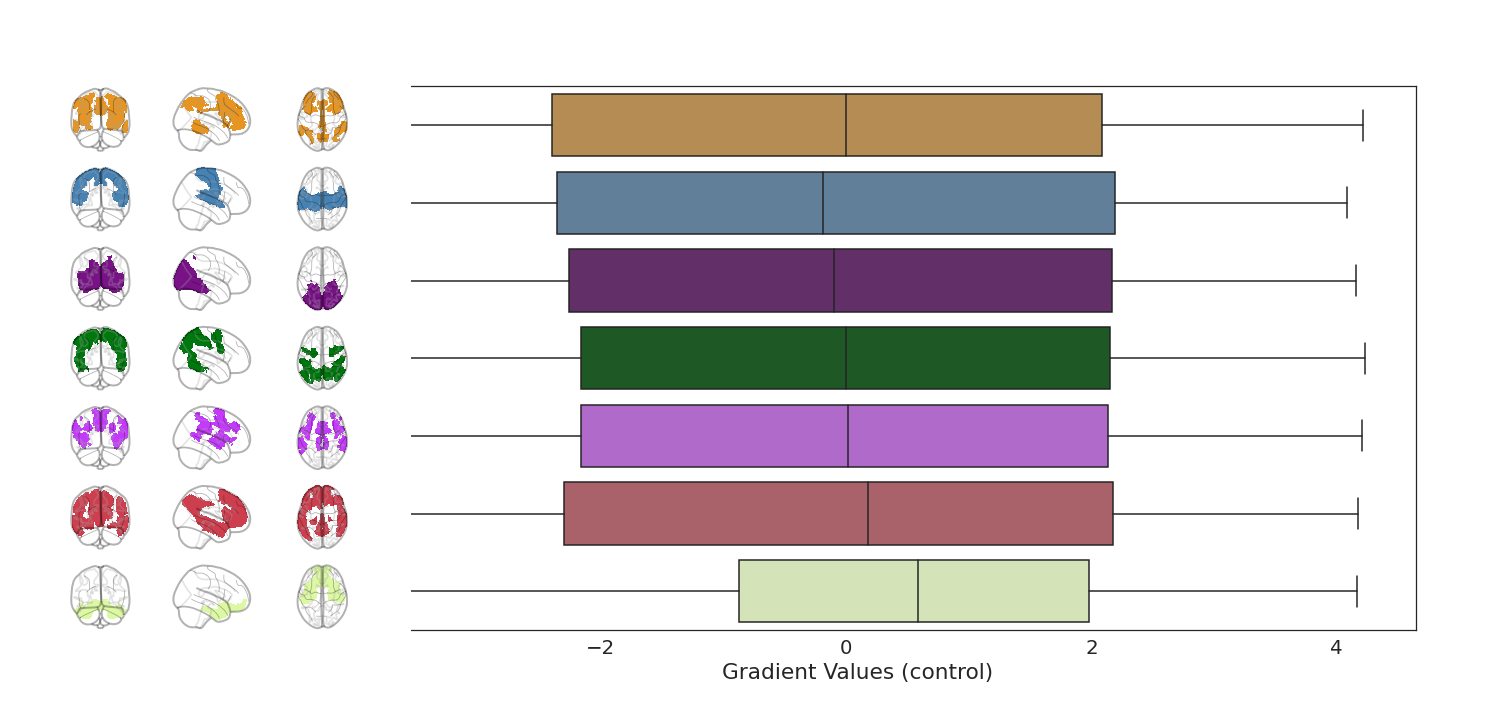

In [18]:
from PIL import Image
from IPython.display import Image as im

for condition in ['control']:
    # ,'meditation','hypnose']:
    a = np.zeros(20484)
    a[lab]=np.mean(embeddings[condition],axis=0)#average across subjects
    emb = a[lab]
    # emb = np.mean(embeddings[condition],axis=0) 


    # yeo7 = np.concatenate((yeo7L[cortL], yeo7L[cortR]))
    yeo7 = np.concatenate((yeo7L[lab_lh], yeo7L[lab_rh]))
    uniqueY = np.array(np.unique(yeo7), dtype=np.int32)[1::]
    sz = len(uniqueY) #7 (corresponds to length network)
    rsns={}
    for c in range(sz): #creates dictionnary
        rsns['k'+str(int(c)+1)]=[]

    r = []     

    for x in range(sz):
        # g = emb[np.where(yeo7 == uniqueY[x]),0]
        g = emb[np.where(yeo7 == uniqueY[x])]
        # for y in g[0]:
        for y in g:
            if y != 0:
                rsns['k'+str(int(x)+1)].append(float(y))
        r.append(np.mean(rsns['k'+str(int(x)+1)]))

    ord = np.argsort(r)

    plot_list=[]
    for c in range(sz):    
        plot_list+=[np.squeeze(rsns['k'+str(ord[c]+1)])]

    names=[]
    for c in range(sz):
        names.append(str(int(ord[c])+1))


#     # convertYeo7 = [2,5,6,0,4,1,3] 
    convertYeo7 = [0,1,2,3,4,5,6]
    # print(convertYeo7)

    cols7 = ((255,255,255),
            (120,  18, 134), #purple
            (70 ,130, 180), #blue
            ( 0 ,118 , 14), #green
            (196 , 58 ,250), #violet
            (220 ,248 ,164), #cream
            (230, 148,  34), #orange
            (205 , 62,  78 )) #red
    cols = cols7
    cols = np.asarray(cols, dtype=float)/255
    yeoCols = ListedColormap(cols,name='colormapYeo')
    # print(yeoCols)

    colors1 = list()
    for i in range(0,len(ord)):
        colors1.append(tuple(cols[convertYeo7[ord[i]] + 1]))

    height=10
    sns.set_context('notebook', font_scale=1.8)
    sns.axes_style("white")
    sns.set_style("white")
    sns.set_palette(colors1)



    fig = plt.figure(figsize=(20,height))
    ax = sns.boxplot(data=plot_list, saturation=0.5, orient='h', showfliers=False) #flierprops=None)#dict(marker='', markersize=0, 
                                                                                #color="white", markeredgecolor="white"))
    ax.set_yticklabels('')
    ax.set(xlabel='Gradient Values ({})'.format(condition))
    # ax.set(ylabel=list(yeo_infos[' Network Name']))
    sns.axes_style("white")
    # sns.axlabel('Gradient Values','', fontsize=22)
    #ax.xlabel('Gradient Values','', fontsize=22)
    # plt.savefig('gradient_data/figures/yeo_dist_plot.pdf')
    # plt.savefig('gradient_data/figures/yeo_dist_plot.png')
    # plt.savefig(output_path+'yeo_dist_plot_{}.pdf'.format(condition))
    plt.savefig(output_path+'yeo_dist_plot_{}.png'.format(condition))
    plt.close(fig)

    fig, axarr = plt.subplots(nrows=sz, ncols=1, figsize=(2*(20/sz),height))
    data = datasets.fetch_atlas_yeo_2011(data_dir='gradient_data/templates/')
    yeoV7 = nibabel.load(data.thick_7)
    y = 0

    for x in range(sz):
        yeoV7_1 = nibabel.Nifti1Image((yeoV7.get_fdata() == convertYeo7[ord[x]] + 1).astype(int), yeoV7.affine)     
        yeoCols = ListedColormap(cols[[0,convertYeo7[ord[x]] + 1]],name='colormapYeo')
        plotting.plot_glass_brain(yeoV7_1, axes=axarr[x], annotate=False, alpha=0.3, cmap=yeoCols, threshold=0.1, 
                            output_file=output_path+'yeo_brains_{}.png'.format(condition))
        y += 1


    i1 = Image.open(output_path+'yeo_dist_plot_{}.png'.format(condition))
    i2 = Image.open(output_path+'yeo_brains_{}.png'.format(condition))
    result = Image.new("RGBA", (np.shape(i1)[1]+50, np.shape(i1)[0]))
    result.paste(i1, (120, 0))
    result.paste(i2, (0, 0))
    result.save(output_path+'Yeo7_{}.png'.format(condition))
    # os.remove(output_path+'yeo_dist_plot_{}.png'.format(condition))
    os.remove(output_path+'yeo_brains_{}.png'.format(condition))
    
im(filename=output_path+'Yeo7_{}.png'.format(condition))



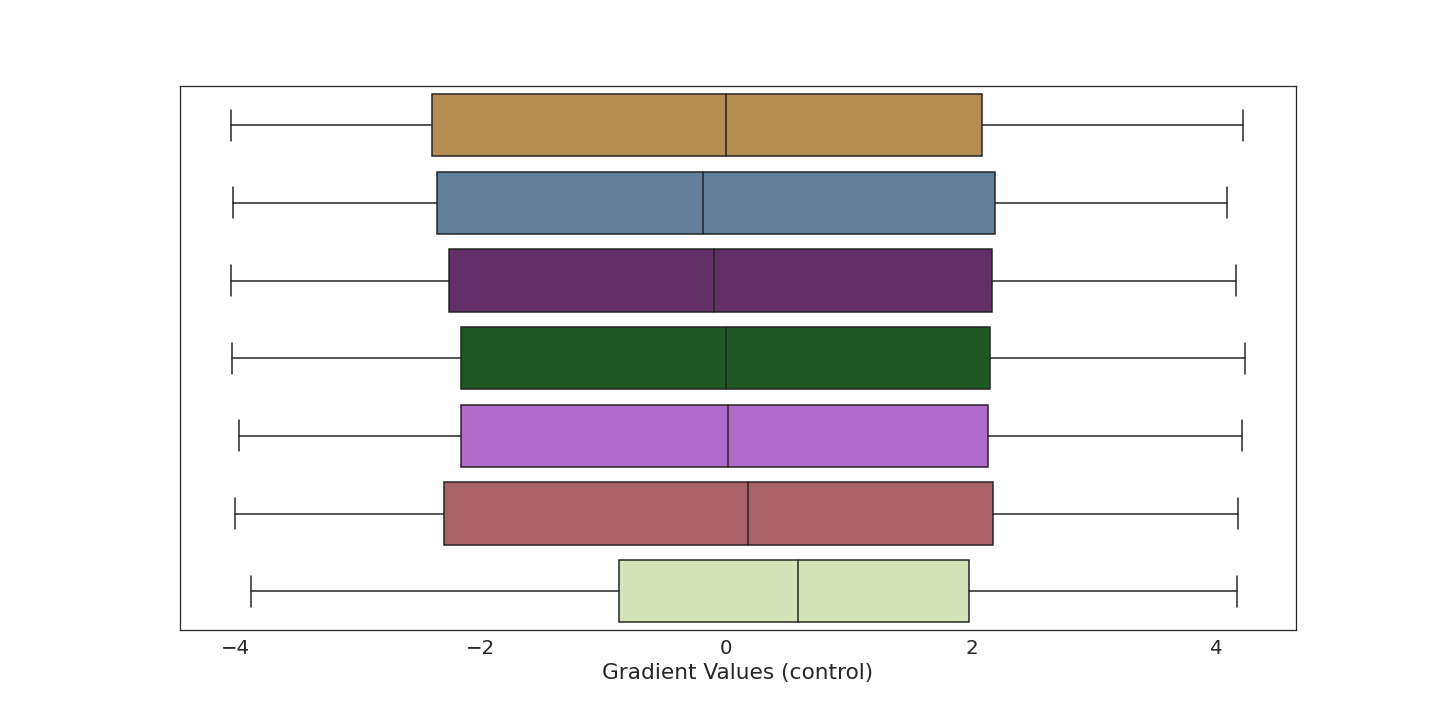

In [19]:
im(filename=output_path+'yeo_dist_plot_{}.png'.format(condition))

In [20]:
atlas_yeo_2011 = datasets.fetch_atlas_yeo_2011()
atlas_yeo = atlas_yeo_2011.thick_7
atlas_yeo
from nilearn.regions import connected_label_regions
region_labels = connected_label_regions(atlas_yeo)
region_labels